#  P C A

Author: Tamal Majumder

######  Its  an unsupervised learning method which is often used to reduce dimensionality of the dataset by transforming a large set into a lower dimension set that still contains most of the information of the large set

###### We try to find new dimensions such that they are orthogonal and hence linearly independent

###### maximizing the varience is very important here

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import numpy as np


class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)


Shape of X: (150, 4)
Shape of transformed X: (150, 2)


C:\Users\987ta\AppData\Local\Temp\ipykernel_27388\3985628446.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


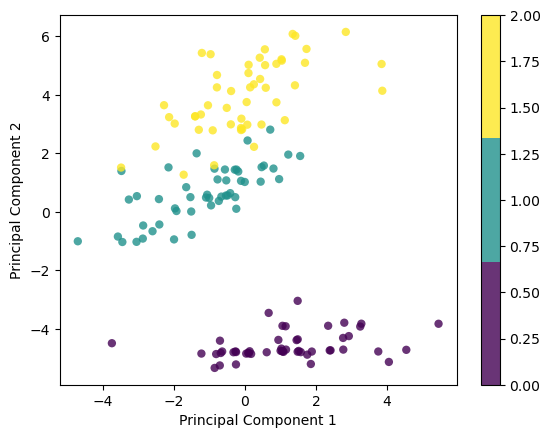

In [11]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    # data = datasets.load_digits()
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()